<ipython-input-16-87c0bc40f81d>:15: RuntimeWarning: divide by zero encountered in double_scalars
  return N * (1 - np.exp(-np.log(2)/T * t))
/opt/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


A parameters: 167.4999999962474 0.0
A parameter errors: [inf inf]
reduced chi squared: 1.4916258169266285


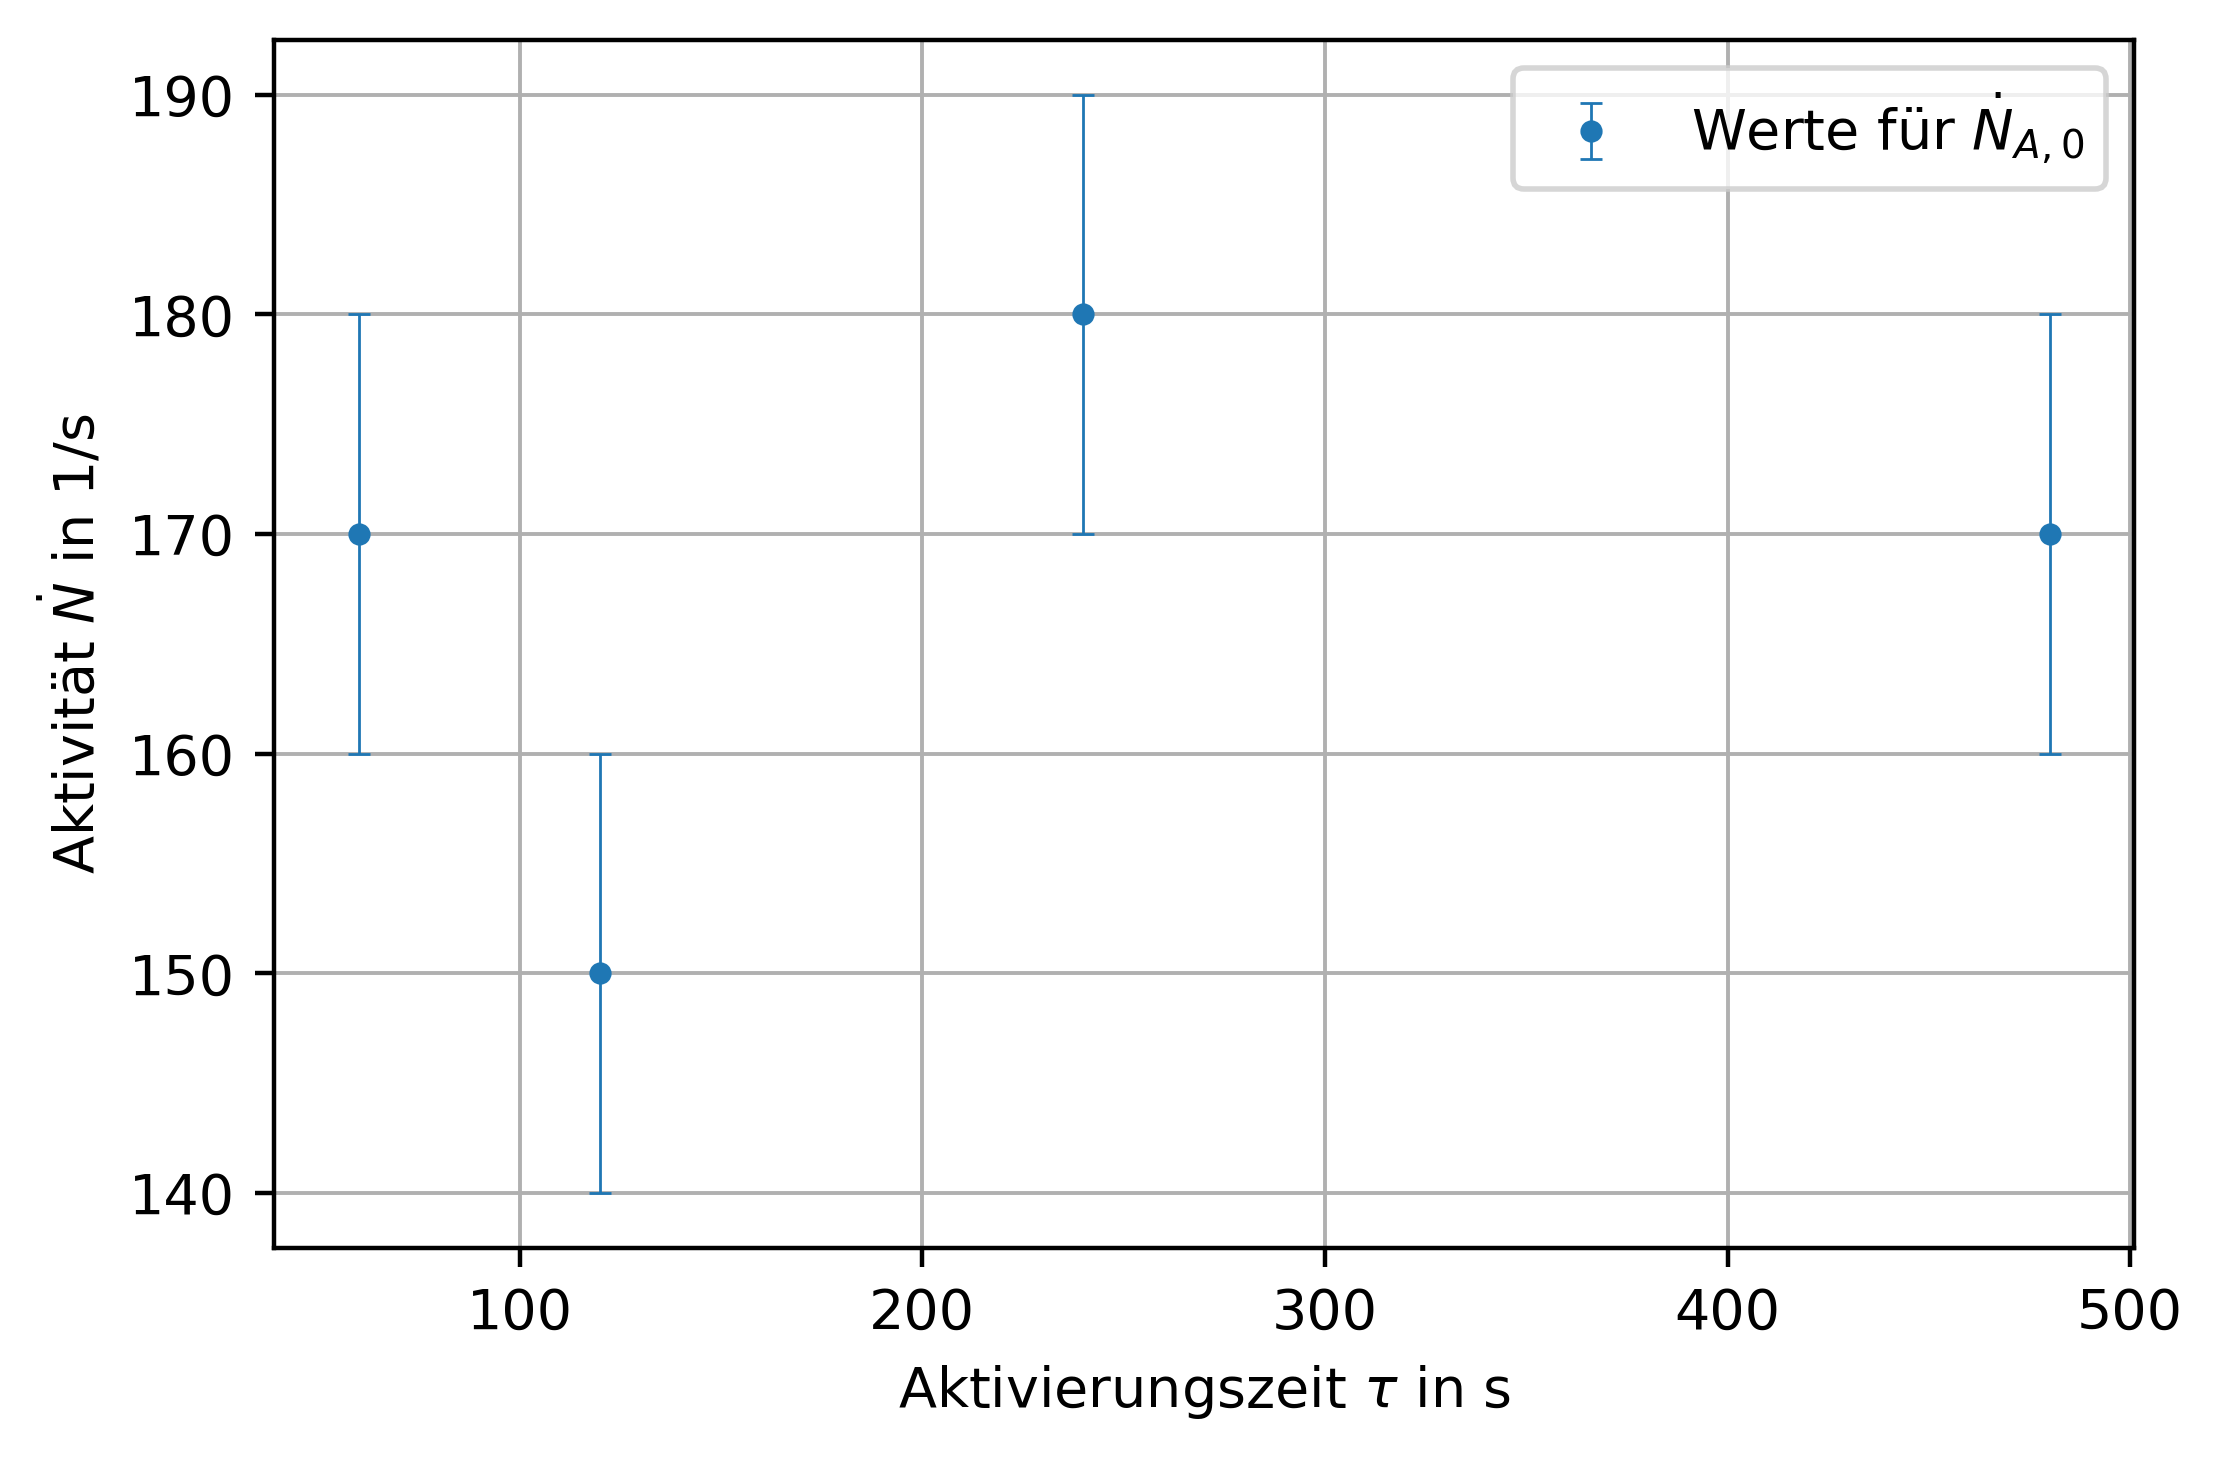

In [16]:
import numpy as np #Numpy enthält viele mathematische Funktionen
import matplotlib.pyplot as plt #enthält die Grundlagen der Darstelllung
import scipy.optimize as opt #liefert Funktionen, mit denen die Funktionsparameter berechnet werden

t = np.array([1,2,4,8])*60 #activation time in seconds

A = np.array([170,150,180,170])
Aerr = np.array([10,10,10,10])
B = np.array([8,14,22,29])
Berr = np.array([1,2,2,3])
x = np.linspace(np.min(t), np.max(t),100)

#fitting function
def f(t,N,T):
    return N * (1 - np.exp(-np.log(2)/T * t))


##A
p0 = [0,0] #In dieser Zeile werden geschätzte Werte für a und b angegeben

fit, err = opt.curve_fit(f, t, A, p0, Aerr)
perr = np.sqrt(np.diag(err))
print("A parameters:", fit[0],fit[1])
print("A parameter errors:", perr)

##compute chi2
chi2 = 0
for i in range(len(t)):
    chi2 += (f(t[i],fit[0],fit[1])-A[i])**2/A[i]
print("reduced chi squared:", chi2/(len(t)-len(p0)))


plt.figure(dpi = 400) #erstellen einer neuen Abbildung
plt.errorbar(t, A, yerr=Aerr, marker='.', ls='', capsize=2, capthick=0.5, lw=0.5, label="Werte für $\dot{N}_{A,0}$") #Die Messwerte werden mit Fehler dargestellt. 
#plt.plot(x, [f(x, *fit) for x in x], label="Fit",lw = 0.5) #Hiermit wird die Funktion dargestellt
#plt.hlines(fit[0],np.min(x),np.max(x),'g',lw = 0.5,label = "$\dot{N}_{A,0}^{\infty}$")
#--------------Stil-----------------------
plt.ylabel("Aktivität $\dot{N}$ in 1/s") #x-Beschriftung
plt.xlabel(r'Aktivierungszeit $\tau$ in s') #y-Beschriftung
plt.grid(lw=0.7) #Darstellung eines Rasters im Hintergrund
plt.legend() #Anzeige der Legende 
plt.savefig('A_act.pdf') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots

B parameters: 32.35755601974672 146.41207050186327
B parameter errors: [0.07067841 0.5368648 ]
reduced chi squared: 5.013579811634061e-05


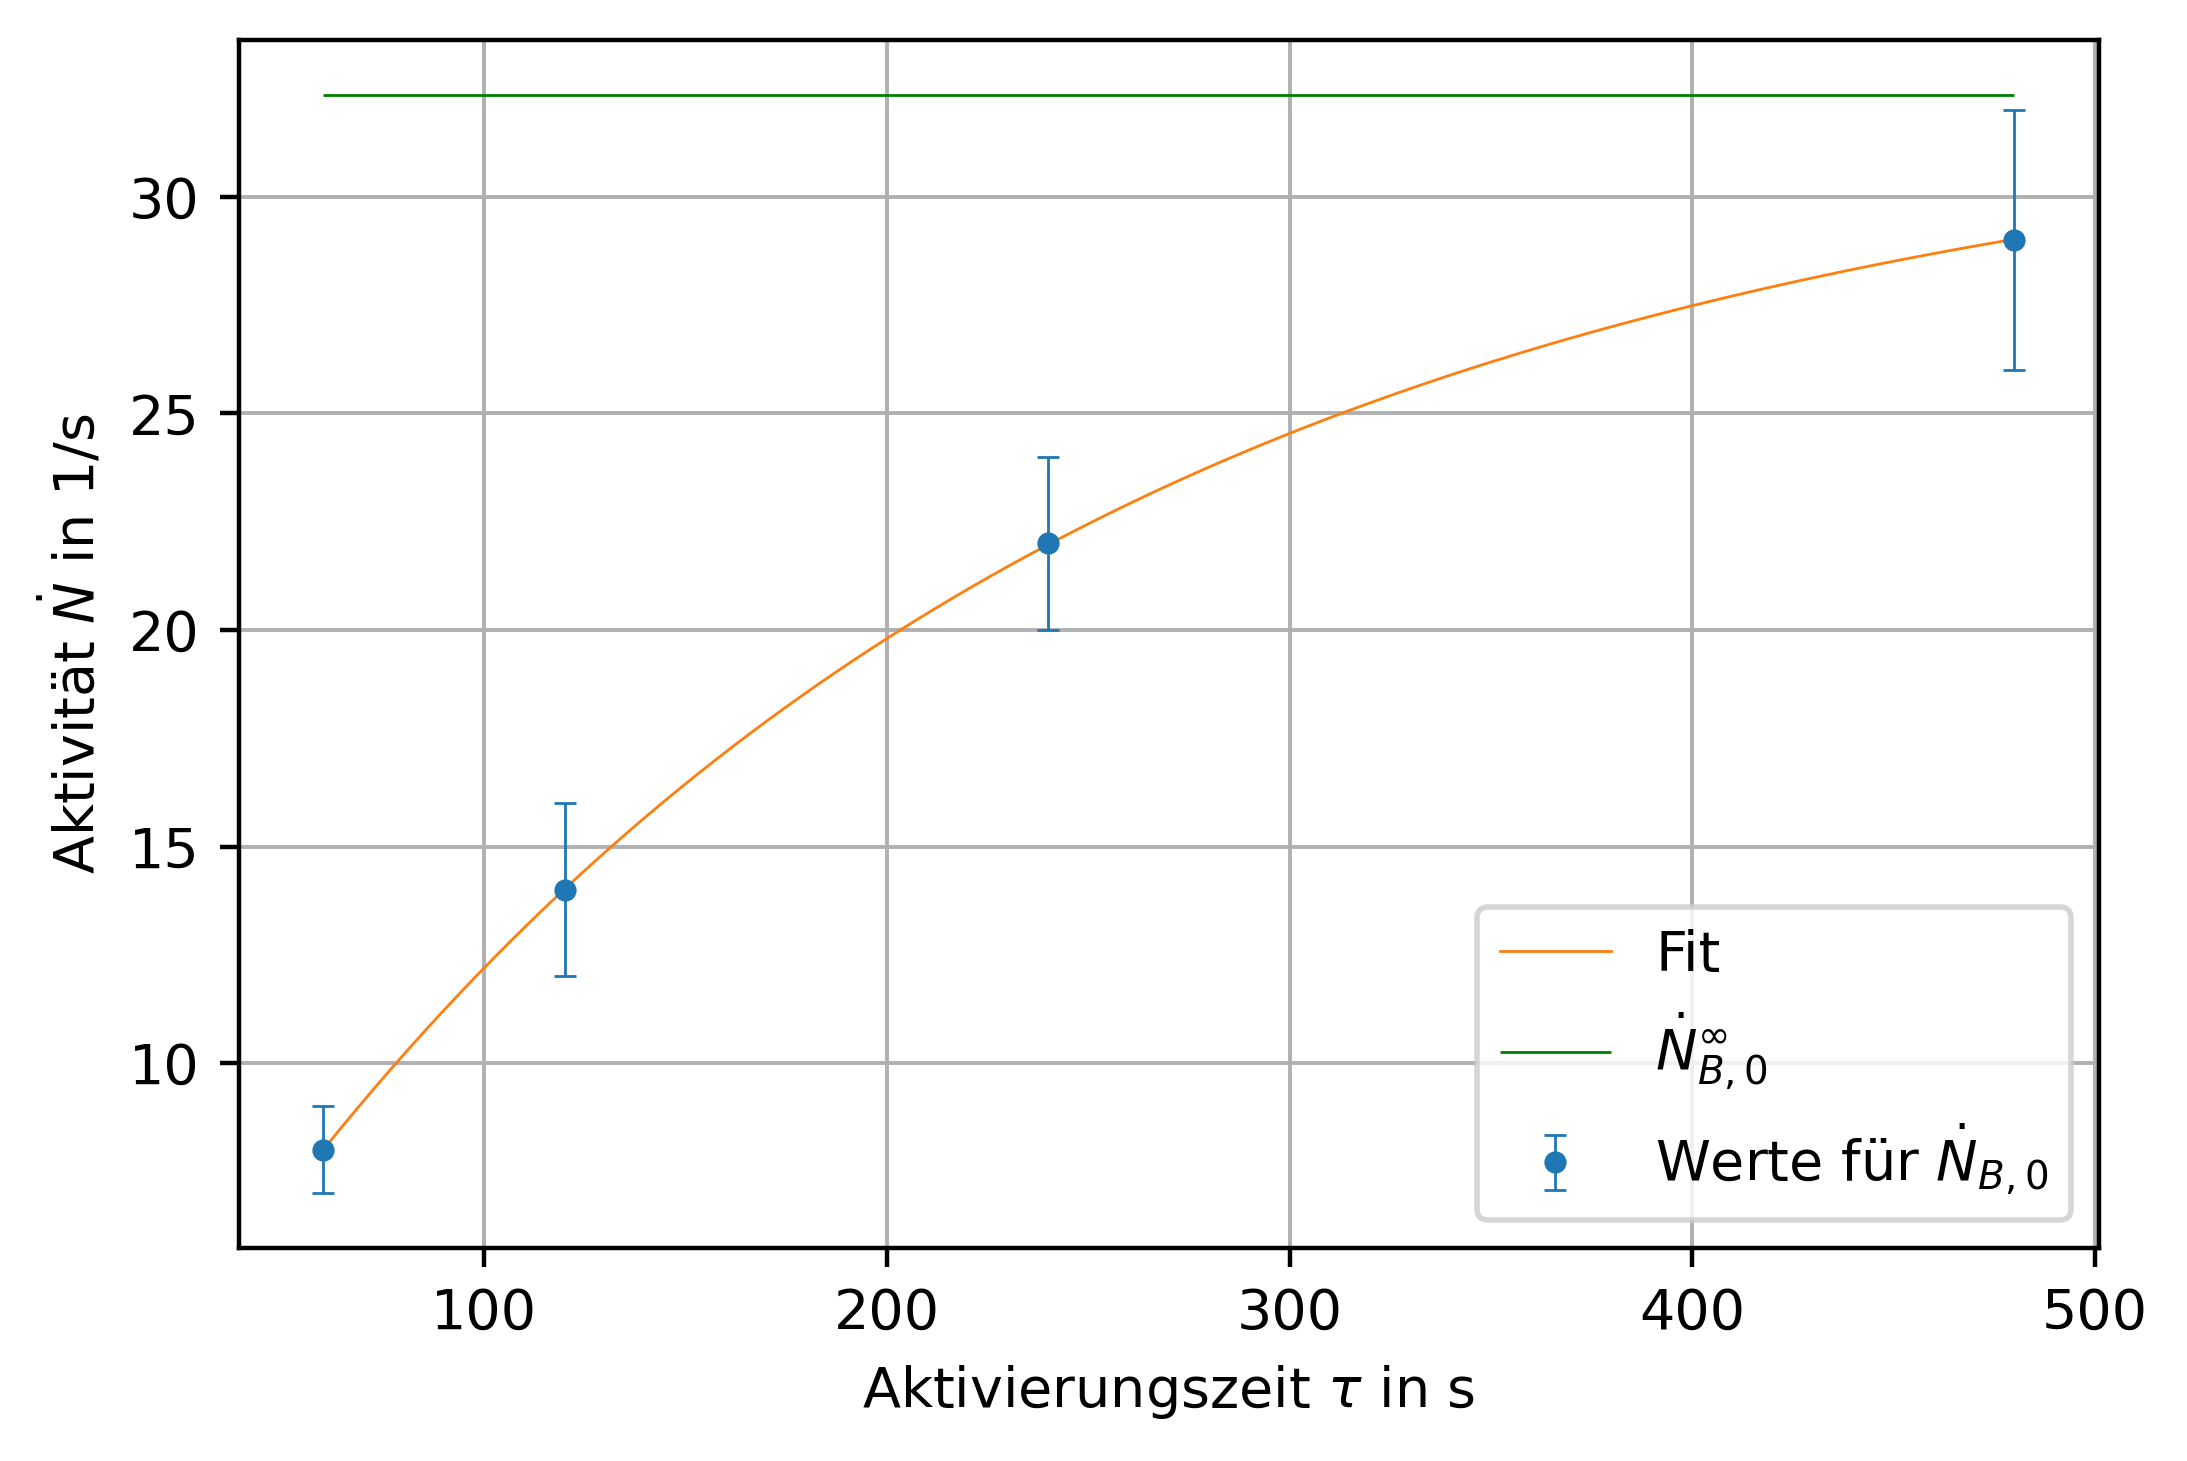

In [17]:
t = np.array([1,2,4,8])*60 #activation time in s
x = np.linspace(np.min(t), np.max(t),100)
##B
p0 = [0.1,2] #In dieser Zeile werden geschätzte Werte für a und b angegeben

fit, err = opt.curve_fit(f, t, B, p0, Berr)
perr = np.sqrt(np.diag(err))
print("B parameters:", fit[0],fit[1])
print("B parameter errors:", perr)
##compute chi2
chi2 = 0
for i in range(len(t)):
    chi2 += (f(t[i],fit[0],fit[1])-B[i])**2/B[i]
print("reduced chi squared:", chi2/(len(t)-len(p0)))

plt.figure(dpi = 400) #erstellen einer neuen Abbildung
plt.errorbar(t, B, yerr=Berr, marker='.', ls='', capsize=2, capthick=0.5, lw=0.5, label="Werte für $\dot{N}_{B,0}$") #Die Messwerte werden mit Fehler dargestellt. 
plt.plot(x, [f(x, *fit) for x in x], label="Fit",lw = 0.5) #Hiermit wird die Funktion dargestellt
plt.hlines(fit[0],np.min(x),np.max(x),'g',lw = 0.5,label = "$\dot{N}_{B,0}^{\infty}$")
#--------------Stil-----------------------
plt.ylabel("Aktivität $\dot{N}$ in 1/s") #x-Beschriftung
plt.xlabel(r'Aktivierungszeit $\tau$ in s') #y-Beschriftung
plt.grid(lw=0.7) #Darstellung eines Rasters im Hintergrund
plt.legend(loc = "lower right") #Anzeige der Legende 
plt.savefig('B_act.pdf') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots